## **PRACTICAL SESSION 1** — Deep Learning for predictive maintenance

The dataset used is the **AI4I 2020** Predictive Maintenance Dataset, which contains 10,000 instances of industrial sensor data. Each instance represents the operating condition of a machine and is associated with a label indicating whether a failure has occurred and, if so, what type of failure it is.

The 5 possible labels are:



*   **TWF**: Tool Wear Failure
*   **HDF**: Heat Dissipation Failure
*   **PWF**: Power Failure
*   **OSF**: Overstrain Failure
*   **RNF**: Random Failure


The data is available on eCAMPUS as CSV file called: "ai4i2020.csv"



## **PRACTICAL SESSION Goal** — Ceate a deep leanring model allowing to realize a predictive maintenance mission

## **1 - Analysis of the dataset**



All libraries used ***SHOULD BE PLACED*** in the code cell below

In [18]:
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

**QUESTION:** Load dataset and display some lines of the csv file.

In [ ]:
#mounting of Google Drive:
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/embedded/data/ai4i2020.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**QUESTION:** Display the distribution of machine failures and non-failures with a bar graph.

Machine failure
0    9661
1     339
Name: count, dtype: int64


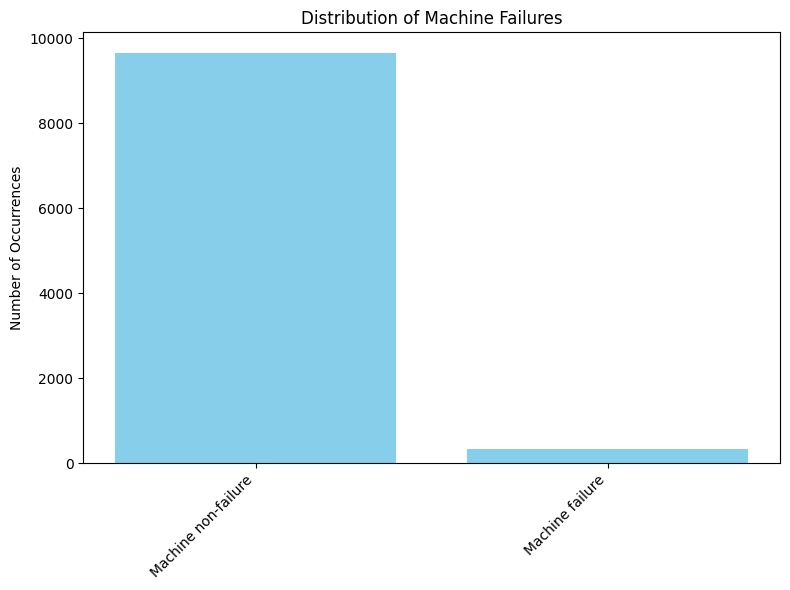

In [ ]:
#count the occurrences of each failure type
failure_counts = data['Machine failure'].value_counts()
print(failure_counts)
lab = ['Machine non-failure', 'Machine failure']
#bar graph
plt.figure(figsize=(8, 6))
plt.bar(lab, failure_counts.values, color = "skyblue")
plt.xlabel("")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Machine Failures")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


**ANALYSIS QUESTION:** What do you observe?

we can observe that the dataset is highly imbalanced, with failures making up only ~3.5% of the total data.

**ANALYSIS QUESTION:** What will be the consequence of this phenomenon on the model's learning?

This could lead to a bias in machine learning models, where they might predict "no failure" most of the time and still achieve high accuracy but fail to detect real failures.

**QUESTION:** Create a bar chart showing the distribution of different failure types (TWF, HDF, PWF, OSF, RNF). Display the exact values above each bar in the chart."

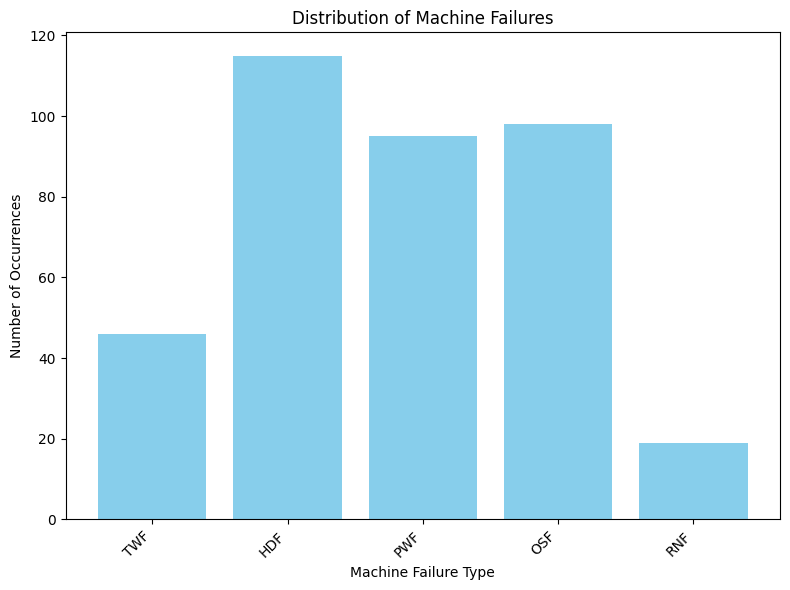

In [ ]:
#failure types
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Count occurrences of each failure type
failure_counts = data[failure_types].sum()

#bar graph
plt.figure(figsize=(8, 6))
plt.bar(failure_types, failure_counts.values, color = 'skyblue')
plt.xlabel("Machine Failure Type")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Machine Failures")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**ANALYSIS QUESTION:** What do you observe?

Among the failure types, HDF, PWF and OSF are predominants. Hence, we can expect those failures to be predicted more frequently than the others, by the model.

**QUESTION:** Create a bar chart showing the distribution of failure types (TWF, HDF, PWF, OSF, RNF) among machines that experienced a failure (Machine failure == 1). Additionally, add a "No Specific Failure" category to count cases where a machine failed but no specific failure type was recorded. Display the exact values above each bar in the chart."

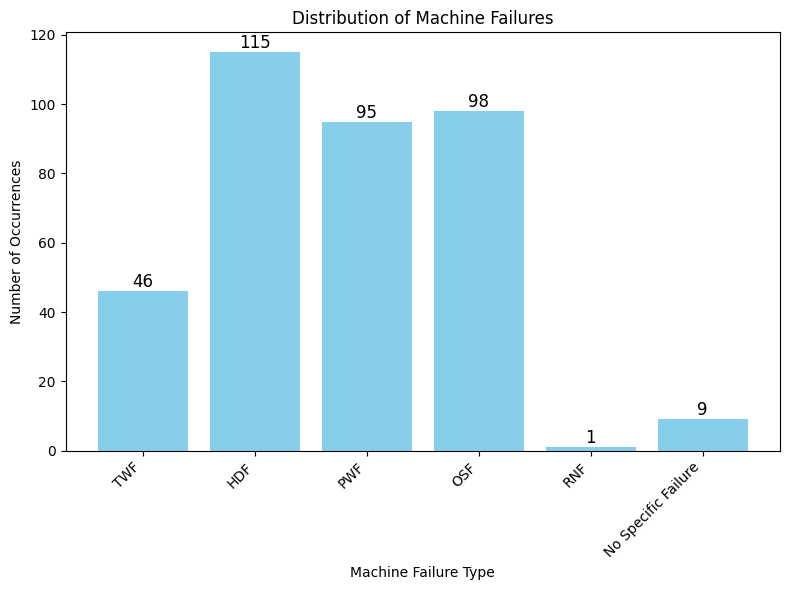

In [ ]:
#machines that experienced a failure
failed_machines = data[data['Machine failure'] == 1]
failure_counts = failed_machines[failure_types].sum()

#cases where no specific failure type is recorded
no_specific_failure_count = (failed_machines[failure_types].sum(axis=1) == 0).sum()

#"No Specific Failure" category
failure_counts['No Specific Failure'] = no_specific_failure_count

#bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(failure_counts.index, failure_counts.values, color='skyblue')

#display exact values on ech bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())),
             ha='center', va='bottom', fontsize=12)

# Labels and title
plt.xlabel("Machine Failure Type")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Machine Failures")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

**ANALYSIS QUESTION:** What do you obsrve comapred to the previous question ? What can you conclude?

Compared to the previous question, we can notice that 9 machines faced a failure with no specific explanation behind. It represents 3% of the total amount of failures. Thus, our model will have at least a 3% margin error.

**QUESTION:** Display the names of the different columns in the dataset with their respective data types.

In [ ]:
print(data.dtypes)

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


**ANALYSIS QUESTION:** To train the model, what will be the inputs and outputs (What are the names of the columns that you will use?)? Justify your response.
Remember, you want to predict if the machine will fail, and if so, what kind of failure. You need to yse previous results to jsurtify your response.

To predict whether a machine will fail and determine the type of failure, we must choose features that influence failures. The most relevant input features (so our Xs) are:

- Air temperature [K]
- Process temperature [K]
- Rotational speed [rpm]
- Torque [Nm]
- Tool wear [min]

We exclude columns like UDI, Product ID, and Type.

## **2- Train model Without balancing the dataset**

---



In this section, you must build and train a model without rebalancing the dataset.

**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [19]:
# input features and outputs
input_features = ['Air temperature [K]', 'Process temperature [K]',
                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
output_labels = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

#features and labels
X = data[input_features].values
Y = data[output_labels].values

#split into training and test sets (we arbitrary choose 80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#print
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (8000, 5)
Y_train shape: (8000, 6)
X_test shape: (2000, 5)
Y_test shape: (2000, 6)


**QUESTION** Code below the model architecture

**QUESTION** Code below the algorithms allowing to train model

**WARNING!** You need to plot the training and test accuracy and loss to check if our model is overfitting

**QUESTION** Plot the confusion matrix and the classification report

**Tips:**

*   classification report link

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   Matrix confusion

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html





**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"

## **3- Train model With balancing the dataset**

---

 Methods for rebalancing a dataset:


*   Use oversampling techniques (e.g., SMOTE) to generate synthetic data for minority classes


> https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



*   Apply undersampling techniques (e.g., random undersampling, Tomek Links, Edited Nearest Neighbors) to reduce the majority class size



> https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html



*   Use class weighting during model training to penalize errors on minority classes



> https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=fr


**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

**ANALYSIS QUESTION:** Explain the choices you made to balance the dataset.

"Write your response here"

**QUESTION:** Code below the model architecture


**TIP:** It could be interesting to keep it the same as before

**QUESTION** Code below the algorithms allowing to train model


**QUESTION** Plot the confusion matrix and the classification report

**ANALYSIS QUESTION** What do you observe? What can you conclude?

"Write your response here"